# pandas_test

This notebook is to test using the pandas library for processing the standings by date data.

In [43]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('precision', 3)

## Exisiting setup

Dates, team, and record (wins and loses) are in a tabular form in a spreadsheet. The first column contains the date in the format `MMM DD, YYYY`. Columns two through sixteen give the team and record with the form "`[team] ([win]-[loss]) [tie_indicator]`" with `team` being the three letter abbreviation of the team's city and the `tie_indicator` only appearing if a team or teams are tied for the same rank (1st, 2nd, etc.).

Currently, the standings data is processed by reading the spreadsheet with `openpyxl`, looping through the rows and using the `parse` library to extract the data from the formatted string. The data is then stored in a two-dimensional `list` of `dict`. 

Once the data is extracted, the win fraction of a given team at a given date is evaluated by looping through the 2-D `list`, evaluating the win fraction at each date for each team and puting the resulting data into a `pandas` `DataFrame`. Since the data set is not that large (15 columns, approx. 170 rows), converting the operations from looping and list comprehensions to operating on a DataFrame, I'm guessing, will not lead to any, if at all, efficiency gains. With the desired end result being a `DataFrame` and the spreadsheet data easily importable with the `read_excel` function, learning more of the `pandas` library to transform the spreadsheet data would make the code could stream line the code.

In [44]:
df = pd.read_excel('./../standings_data/2017_west_standings_by_date.xlsx',header=None,index_col=0,parse_dates=True,names=['1st','2nd', '3rd', '4th', '5th','6th', '7th', '8th','9th', '10th', '11th', '12th', '13th', '14th', '15th'])
df

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,11th,12th,13th,14th,15th
2016-10-25,POR (1-0) T1,SAS (1-0) T1,GSW (0-1) T3,UTA (0-1) T3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-26,DEN (1-0) T1,LAL (1-0) T1,MEM (1-0) T1,OKC (1-0) T1,POR (1-0) T1,SAC (1-0) T1,SAS (1-0) T1,DAL (0-1) T8,GSW (0-1) T8,HOU (0-1) T8,MIN (0-1) T8,NOP (0-1) T8,PHO (0-1) T8,UTA (0-1) T8,NaN
2016-10-27,SAS (2-0),DEN (1-0) T2,LAC (1-0) T2,LAL (1-0) T2,MEM (1-0) T2,OKC (1-0) T2,POR (1-1) T7,SAC (1-1) T7,DAL (0-1) T9,GSW (0-1) T9,HOU (0-1) T9,MIN (0-1) T9,NOP (0-1) T9,PHO (0-1) T9,UTA (0-1) T9
2016-10-28,OKC (2-0) T1,SAS (2-0) T1,DEN (1-0) T3,LAC (1-0) T3,MEM (1-0) T3,GSW (1-1) T6,HOU (1-1) T6,LAL (1-1) T6,POR (1-1) T6,SAC (1-1) T6,UTA (1-1) T6,PHO (0-2),MIN (0-1),DAL (0-2) T14,NOP (0-2) T14
2016-10-29,SAS (3-0),OKC (2-0),LAC (1-0),POR (2-1) T4,SAC (2-1) T4,DEN (1-1) T6,GSW (1-1) T6,HOU (1-1) T6,LAL (1-1) T6,MEM (1-1) T6,UTA (1-1) T6,DAL (0-2) T12,MIN (0-2) T12,PHO (0-2) T12,NOP (0-3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-08,GSW (66-14),SAS (61-19),HOU (53-26),LAC (49-31) T4,UTA (49-31) T4,OKC (45-34),MEM (43-37),POR (40-40),DEN (38-41),NOP (33-47),DAL (32-47),MIN (31-48) T12,SAC (31-48) T12,LAL (24-55),PHO (23-57)
2017-04-09,GSW (66-14),SAS (61-19),HOU (54-26),LAC (49-31) T4,UTA (49-31) T4,OKC (46-34),MEM (43-38),POR (40-40),DEN (38-42),NOP (33-47),DAL (32-48),MIN (31-49) T12,SAC (31-49) T12,LAL (25-55),PHO (24-57)
2017-04-10,GSW (66-15),SAS (61-20),HOU (54-27),LAC (50-31) T4,UTA (50-31) T4,OKC (46-34),MEM (43-38),POR (41-40),DEN (38-42),NOP (33-47),DAL (32-48),MIN (31-49) T12,SAC (31-49) T12,LAL (25-55),PHO (24-57)
2017-04-11,GSW (66-15),SAS (61-20),HOU (54-27),LAC (50-31) T4,UTA (50-31) T4,OKC (47-34),MEM (43-38),POR (41-40),DEN (39-42),NOP (33-48),DAL (32-49) T11,SAC (32-49) T11,MIN (31-50),LAL (26-55),PHO (24-58)


## Extracting the data

A column of the `DataFrame` resulting from reading the spreadsheet with `read_excel` will look something like the following:

In [45]:
spam = pd.Series(['CLE (1-0)','BOS (1-0) T1', 'ATL (1-0) T1', 'CHO (2-0) T1'])
print(spam)

0       CLE (1-0)
1    BOS (1-0) T1
2    ATL (1-0) T1
3    CHO (2-0) T1
dtype: object


`Series` objects let you use regex to extract data out of strings with a defined pattern and will return a `DataFrame`. For the purposes of plotting each teams win fraction with time, the tie indicator not of any interest so the regex pattern that will extract the standings data is the following:

In [46]:
standings_pat = r'(?P<team>[A-Z]{3})\s\((?P<win>\d+)\-(?P<loss>\d+)\)'
standings_pat

'(?P<team>[A-Z]{3})\\s\\((?P<win>\\d+)\\-(?P<loss>\\d+)\\)'

Applying the regex pattern to the series to extract the data using `str.extract`. The `expand` keyword determines if the return type is a `DataFrame`, `Series`, or `Index`. If it is `False`, `extract` will return a `Series` or `Index` if there is only one capture group otherwise `extract` returns a `DataFrame`. `expand` defualts to true and since a `DataFrame` return is desired, it is best to leave `expand` as the default.

In [47]:
eggs = spam.str.extract(standings_pat)
eggs

,team,win,loss
0,CLE,1,0
1,BOS,1,0
2,ATL,1,0
3,CHO,2,0


In [48]:
type(eggs)

pandas.core.frame.DataFrame

Parameters will remain string objects and you will need to convert them to numeric data types with the `to_numeric` function

In [49]:
eggs['win']

0    1
1    1
2    1
3    2
Name: win, dtype: object

In [50]:
eggs['win'] = pd.to_numeric(eggs['win'])
eggs['loss'] = pd.to_numeric(eggs['loss'])
eggs['win']

0    1
1    1
2    1
3    2
Name: win, dtype: int64

With the win/loss data converted to numeric data, the win fraction can be easily evaluated

In [51]:
eggs['GP'] = eggs['win'] + eggs['loss']
eggs['PCT'] = eggs['win'] / eggs['GP']
eggs

,team,win,loss,GP,PCT
0,CLE,1,0,1,1.0
1,BOS,1,0,1,1.0
2,ATL,1,0,1,1.0
3,CHO,2,0,2,1.0


Since `str.extract` returns a `DataFrame`, we will need to setup a `DataFrame` with `MultiIndex` columns. To setup the `MultiIndex`, make a list of arrays with the column titles and use the `MultiIndex.from_product` function.

In [52]:
arrays = [np.array(df.columns), np.array(['team','win','loss','GP','PCT'])]

In [53]:
multi = pd.MultiIndex.from_product(arrays)

In [54]:
foo = pd.DataFrame(columns=multi,index= df.index )
foo

1st                      2nd                      ... 14th       \
           team  win loss   GP  PCT team  win loss   GP  PCT  ... team  win   
2016-10-25  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2016-10-26  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2016-10-27  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2016-10-28  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2016-10-29  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2017-04-08  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2017-04-09  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2017-04-10  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2017-04-11  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2017-04-12  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

                          15th                      
           loss   GP  PCT team  win loss   GP  PCT  
2016-10-25  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-10-26  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-10-27  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-10-28  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-10-29  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...         ...  ...  ...  ...  ...  ...  ...  ...  
2017-04-08  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-04-09  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-04-10  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-04-11  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-04-12  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[170 rows x 75 columns]

In [55]:
for column in df:
    temp = df[column].str.extract(standings_pat)
    temp['win'] = pd.to_numeric(temp['win'])
    temp['loss'] = pd.to_numeric(temp['loss'])
    temp['GP'] = temp['win'] + temp['loss']
    temp['PCT'] = temp['win'] / temp['GP']
    foo[column] = temp

In [56]:
foo

1st                      2nd                      ... 14th       \
           team win loss  GP    PCT team win loss  GP    PCT  ... team  win   
2016-10-25  POR   1    0   1      1  SAS   1    0   1      1  ...  NaN  NaN   
2016-10-26  DEN   1    0   1      1  LAL   1    0   1      1  ...  UTA    0   
2016-10-27  SAS   2    0   2      1  DEN   1    0   1      1  ...  PHO    0   
2016-10-28  OKC   2    0   2      1  SAS   2    0   2      1  ...  DAL    0   
2016-10-29  SAS   3    0   3      1  OKC   2    0   2      1  ...  PHO    0   
...         ...  ..  ...  ..    ...  ...  ..  ...  ..    ...  ...  ...  ...   
2017-04-08  GSW  66   14  80  0.825  SAS  61   19  80  0.762  ...  LAL   24   
2017-04-09  GSW  66   14  80  0.825  SAS  61   19  80  0.762  ...  LAL   25   
2017-04-10  GSW  66   15  81  0.815  SAS  61   20  81  0.753  ...  LAL   25   
2017-04-11  GSW  66   15  81  0.815  SAS  61   20  81  0.753  ...  LAL   26   
2017-04-12  GSW  67   15  82  0.817  SAS  61   21  82  0.744  ...  LAL   26   

                            15th                        
           loss   GP    PCT team  win loss   GP    PCT  
2016-10-25  NaN  NaN    NaN  NaN  NaN  NaN  NaN    NaN  
2016-10-26    1    1      0  NaN  NaN  NaN  NaN    NaN  
2016-10-27    1    1      0  UTA    0    1    1      0  
2016-10-28    2    2      0  NOP    0    2    2      0  
2016-10-29    2    2      0  NOP    0    3    3      0  
...         ...  ...    ...  ...  ...  ...  ...    ...  
2017-04-08   55   79  0.304  PHO   23   57   80  0.287  
2017-04-09   55   80  0.312  PHO   24   57   81  0.296  
2017-04-10   55   80  0.312  PHO   24   57   81  0.296  
2017-04-11   55   81  0.321  PHO   24   58   82  0.293  
2017-04-12   56   82  0.317  PHO   24   58   82  0.293  

[170 rows x 75 columns]

Getting the list of teams, ordered by final ranking, can be extracted from the `DataFrame` with the following code.

In [57]:
dates = foo.index
team_list = list(foo.loc[dates[-1],(slice(None),'team')].values)

In [58]:
team_list

['GSW',
 'SAS',
 'HOU',
 'LAC',
 'UTA',
 'OKC',
 'MEM',
 'POR',
 'DEN',
 'NOP',
 'DAL',
 'SAC',
 'MIN',
 'LAL',
 'PHO']

It seems to be difficult to filter the `DataFrame` with `MultiIndex` columns to get the standings data for an individual team. A different strategy is needed. 

Stacking the `DataFrame` from the initial import from `Excel` seems to be a better way of going about it. It will produce a `Series` object with a `MultiIndex` that could be more maleable than the `DataFrame`.

In [59]:
bar = df.stack(dropna=False)
bar

2016-10-25  1st     POR (1-0) T1
            2nd     SAS (1-0) T1
            3rd     GSW (0-1) T3
            4th     UTA (0-1) T3
            5th              NaN
                        ...     
2017-04-12  11th     DAL (33-49)
            12th     SAC (32-50)
            13th     MIN (31-51)
            14th     LAL (26-56)
            15th     PHO (24-58)
Length: 2550, dtype: object

Setting `dropna` to `False` in the call to `stack` keeps the empty entries at the start of the season when some teams have yet to play a game. Might be better to leave it as the default `True`.

In [60]:
type(bar)

pandas.core.series.Series

In [61]:
baz = bar.str.extract(standings_pat,expand=False)
baz


team  win loss
2016-10-25 1st   POR    1    0
           2nd   SAS    1    0
           3rd   GSW    0    1
           4th   UTA    0    1
           5th   NaN  NaN  NaN
...              ...  ...  ...
2017-04-12 11th  DAL   33   49
           12th  SAC   32   50
           13th  MIN   31   51
           14th  LAL   26   56
           15th  PHO   24   58

[2550 rows x 3 columns]

In [62]:
type(baz)

pandas.core.frame.DataFrame

In [63]:
baz['win'] = pd.to_numeric(baz['win'])
baz['loss'] = pd.to_numeric(baz['loss'])
baz['GP'] = baz['win'] + baz['loss']
baz['PCT'] = baz['win'] / baz['GP']

In [64]:
baz

team   win  loss    GP    PCT
2016-10-25 1st   POR   1.0   0.0   1.0  1.000
           2nd   SAS   1.0   0.0   1.0  1.000
           3rd   GSW   0.0   1.0   1.0  0.000
           4th   UTA   0.0   1.0   1.0  0.000
           5th   NaN   NaN   NaN   NaN    NaN
...              ...   ...   ...   ...    ...
2017-04-12 11th  DAL  33.0  49.0  82.0  0.402
           12th  SAC  32.0  50.0  82.0  0.390
           13th  MIN  31.0  51.0  82.0  0.378
           14th  LAL  26.0  56.0  82.0  0.317
           15th  PHO  24.0  58.0  82.0  0.293

[2550 rows x 5 columns]

In [65]:
baz['rank'] = baz.index.levels[1][baz.index.codes[1]]
baz.index = baz.index.droplevel(1)
baz

,team,win,loss,GP,PCT,rank
2016-10-25,POR,1.0,0.0,1.0,1.000,1st
2016-10-25,SAS,1.0,0.0,1.0,1.000,2nd
2016-10-25,GSW,0.0,1.0,1.0,0.000,3rd
2016-10-25,UTA,0.0,1.0,1.0,0.000,4th
2016-10-25,NaN,NaN,NaN,NaN,NaN,5th
...,...,...,...,...,...,...
2017-04-12,DAL,33.0,49.0,82.0,0.402,11th
2017-04-12,SAC,32.0,50.0,82.0,0.390,12th
2017-04-12,MIN,31.0,51.0,82.0,0.378,13th
2017-04-12,LAL,26.0,56.0,82.0,0.317,14th


At this point, `baz` looks like it would be a good return for `get_standings_data_from_spreadsheet`. The code bellow relies on the `team_list` parameter which was retrieved from the `foo` `DataFrame`. Need to find a way to get it from the `baz` `DataFrame`.

In [66]:
end_date = baz.index[-1]
list(baz.loc[end_date,'team'])

['GSW',
 'SAS',
 'HOU',
 'LAC',
 'UTA',
 'OKC',
 'MEM',
 'POR',
 'DEN',
 'NOP',
 'DAL',
 'SAC',
 'MIN',
 'LAL',
 'PHO']

In [67]:
df_list = [baz[baz['team'] == team] for team in team_list]

In [68]:
df_list[0]

,team,win,loss,GP,PCT,rank
2016-10-25,GSW,0.0,1.0,1.0,0.000,3rd
2016-10-26,GSW,0.0,1.0,1.0,0.000,9th
2016-10-27,GSW,0.0,1.0,1.0,0.000,10th
2016-10-28,GSW,1.0,1.0,2.0,0.500,6th
2016-10-29,GSW,1.0,1.0,2.0,0.500,7th
...,...,...,...,...,...,...
2017-04-08,GSW,66.0,14.0,80.0,0.825,1st
2017-04-09,GSW,66.0,14.0,80.0,0.825,1st
2017-04-10,GSW,66.0,15.0,81.0,0.815,1st
2017-04-11,GSW,66.0,15.0,81.0,0.815,1st


In [69]:
df_list[0].index

DatetimeIndex(['2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28',
               '2016-10-29', '2016-10-30', '2016-10-31', '2016-11-01',
               '2016-11-02', '2016-11-03',
               ...
               '2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06',
               '2017-04-07', '2017-04-08', '2017-04-09', '2017-04-10',
               '2017-04-11', '2017-04-12'],
              dtype='datetime64[ns]', length=170, freq=None)

In [70]:
baz[baz['team'] == 'GSW']['PCT']

2016-10-25    0.000
2016-10-26    0.000
2016-10-27    0.000
2016-10-28    0.500
2016-10-29    0.500
              ...  
2017-04-08    0.825
2017-04-09    0.825
2017-04-10    0.815
2017-04-11    0.815
2017-04-12    0.817
Name: PCT, Length: 170, dtype: float64

In [71]:
win_frac_data = [baz[baz['team'] == team]['PCT'] for team in team_list]

In [72]:
win_frac_data[0]

2016-10-25    0.000
2016-10-26    0.000
2016-10-27    0.000
2016-10-28    0.500
2016-10-29    0.500
              ...  
2017-04-08    0.825
2017-04-09    0.825
2017-04-10    0.815
2017-04-11    0.815
2017-04-12    0.817
Name: PCT, Length: 170, dtype: float64

In [73]:
win_frac_df = pd.concat(win_frac_data, axis=1, keys=team_list)
win_frac_df

,GSW,SAS,HOU,LAC,UTA,OKC,MEM,POR,DEN,NOP,DAL,SAC,MIN,LAL,PHO
2016-10-25,0.000,1.000,NaN,NaN,0.000,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-26,0.000,1.000,0.000,NaN,0.000,1.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000
2016-10-27,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.500,1.000,0.000,0.000,0.500,0.000,1.000,0.000
2016-10-28,0.500,1.000,0.500,1.000,0.500,1.000,1.000,0.500,1.000,0.000,0.000,0.500,0.000,0.500,0.000
2016-10-29,0.500,1.000,0.500,1.000,0.500,1.000,0.500,0.667,0.500,0.000,0.000,0.667,0.000,0.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-08,0.825,0.762,0.671,0.613,0.613,0.570,0.537,0.500,0.481,0.412,0.405,0.392,0.392,0.304,0.287
2017-04-09,0.825,0.762,0.675,0.613,0.613,0.575,0.531,0.500,0.475,0.412,0.400,0.388,0.388,0.312,0.296
2017-04-10,0.815,0.753,0.667,0.617,0.617,0.575,0.531,0.506,0.475,0.412,0.400,0.388,0.388,0.312,0.296
2017-04-11,0.815,0.753,0.667,0.617,0.617,0.580,0.531,0.506,0.481,0.407,0.395,0.395,0.383,0.321,0.293


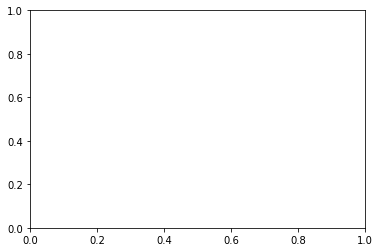

In [80]:
fig, axes = plt.subplots()